In [1]:
#install.packages("quadprog")

In [2]:
#install.packages("PerformanceAnalytics")

In [3]:
#install.packages("IntroCompFinR", repos="http://R-Forge.R-project.org")

In [1]:
library(IntroCompFinR)

Warning message:
"package 'IntroCompFinR' was built under R version 3.6.3"Loading required package: xts
Warning message:
"package 'xts' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [16]:
ativos <- c("ITSA4", "ABEV3", "BRML3", "OIBR3", "TCSA4")
trpl_ret <- c(0.6202,0.1148,0.4727,0.0828,0.2451,0.3894)
abev_ret <- c(-0.0101,0.1421,-0.0413,0.3390,-0.2554,0.2442)
itsa_ret <- c(0.2110,-0.1381,0.4477,0.3907,0.3310,0.3503)
enat_ret <- c(-0.2520,-0.1464,-0.0524,1.0703,-0.0024,0.9465)
seer_ret <- c(0.2765,-0.7195,1.4738,0.7105,-0.4898,0.9836)
oibr_ret <- c(-0.7472,-0.7372,0.095,0.3827,-0.5387,-0.3120)
tcsa_ret <- c(-0.5438,-0.2432,-0.0446,-0.0374,-0.2961,0.2661)
petr_ret <- c(-0.3783,-0.2815,1.2132,0.0829,0.4591,0.3687)
vale_ret <- c(-0.3309,-0.3573,0.9826,0.6256,0.3111,0.0685)
itub_ret <- c(0.2448,-0.1094,0.4903,0.2964,0.3241,0.1198)
b3sa_ret <- c(-0.0868,0.2198,0.5525,0.4049,0.2079,0.6326)
mglu_ret <- c(0.0380,-0.6967,5.0378,5.0921,1.2639,1.1219)
vvar_ret <- c(-0.0646,-0.7955,1.4861,1.2123-0.4457,1.5444)
lren_ret <- c(0.2784,0.1529,0.4116,0.7283,0.2019,0.4905)
rent_ret <- c(0.0812,-0.2848,0.4142,1.0540,0.3613,0.6875)
suzb_ret <- c(0.2191,0.7291,-0.2235,0.3650,1.0473,0.0534)
egie_ret <- c(-0.0139,0.0628,0.0705,0.0931,0.2998,0.5920)
enbr_ret <- c(-0.0906,0.3746,0.2537,0.0565,0.0930,0.5843)
flry_ret <- c(0,1.3794,0.6891,-0.3099,0.6188)
hype_ret <- c(-0.0577,0.3398,0.2245,0.4773,-0.1193,0.2177)
pssa_ret <- c(-0.0259,-0.0287,0.4046,0.5575,0.2463)
wizs_ret <- c(-0.2909,0.4966,-0.1054,-0.3719,1.3034)
bpan_ret <- c(-0.2922,-0.2065,0.4634,0.0722,4.4923)
abcb_ret <- c(-0.2794,0.7739,0.3336,0.0564,0.2682)
caml_ret <- c(0,0,0,-0.1144,-0.0799,0.3039)
mdia_ret <- c(-0.2399,0.7503,0.3726,-0.1718,-0.1086)
bees_ret <- c(-0.1423,3.9837,0.5007,0.4186,0.2244,0.4578)
brsr_ret <- c(-0.2354,0.3301,1.3937,-0.1072,0.1269)
prio_ret <- c(-0.4923,-0.4674,0.7780,2.7696,0.2124,2.3735)
taee_ret <- c(0.0357,-0.1184,0.2471,0.0304,0.1734,0.2578)
cdi_ret <- c(0.1077,0.1325,0.1394,0.0990,0.0640,0.0594)
wti_ret <- c(-0.3106,0.4365,0.1155,-0.2445,0.3624)
gold_ret <- c(-0.0176,-0.1038,0.0843,0.1313,-0.0156,0.1833)
ficverde_ret <- c(0.4727,-0.1682,0.1463,0.064,0.2586)
mult_ret <- c(-0.0333,-0.1668,0.5842,0.2331,0.0219,0.3745)
odpv_ret <- c(0.0493,-0.0081,0.3686,0.3128,-0.1105,0.2664)
bitc_ret <- c(-0.5215,0.9977,0.9050,12.8961,-0.6932,0.9619)
goog_ret <- c(0.0692,1.1769,-0.1461,0.3265,0.1626,0.3410)
aapl_ret <- c(0.5641,0.4082,-0.0730,0.4734,0.0861,0.9635)
amzn_ret <- c(-0.1246,2.2223,-0.0616,0.5556,0.5015,0.3061)
doll_ret <- c(0.1249,0.4902,-0.1627,0.0178,0.1712,0.0357)
wege_ret <- c(0.2734,-0.0221,0.0431,0.5656,-0.0636,0.9671)
whrl_ret <- c(0.1859,-0.3655,0.3292,0.7930,0.0551,1.1939)
brml_ret <- c(-0.0056,-0.3035,0.4174,0.2423,0.0412,0.4767)

In [17]:
retornos <- cbind(itsa_ret, abev_ret, brml_ret, oibr_ret, tcsa_ret)
colnames(retornos) <- ativos
retornos

ITSA4,ABEV3,BRML3,OIBR3,TCSA4
0.2110,-0.0101,-0.0056,-0.7472,-0.5438
-0.1381,0.1421,-0.3035,-0.7372,-0.2432
0.4477,-0.0413,0.4174,0.0950,-0.0446
0.3907,0.3390,0.2423,0.3827,-0.0374
0.3310,-0.2554,0.0412,-0.5387,-0.2961
0.3503,0.2442,0.4767,-0.3120,0.2661


In [18]:
retorno_medio <- rbind(mean(retornos[,1]), mean(retornos[,2]), mean(retornos[,3]), mean(retornos[,4]), mean(retornos[,5]))
rownames(retorno_medio) <- ativos
retorno_medio

ITSA4,0.2654333
ABEV3,0.0697500
BRML3,0.1447500
OIBR3,-0.3095667
TCSA4,-0.1498333


In [19]:
matriz_cov <- cov(retornos)

rownames(matriz_cov) <- ativos
colnames(matriz_cov) <- ativos

matriz_cov

,ITSA4,ABEV3,BRML3,OIBR3,TCSA4
ITSA4,0.045243271,-0.003575162,0.05447294,0.06832262,0.02361896
ABEV3,-0.003575162,0.046518707,0.01342801,0.04390993,0.03268157
BRML3,0.054472940,0.013428015,0.08566012,0.09164791,0.05879184
OIBR3,0.068322617,0.043909926,0.09164791,0.21396171,0.07304997
TCSA4,0.023618963,0.032681570,0.05879184,0.07304997,0.07640737


In [20]:
tx_livre_risco <- 0.0225

In [21]:
short_selling <- F

In [22]:
carteira_eficiente <- tangency.portfolio(retorno_medio, matriz_cov, tx_livre_risco, shorts = short_selling)

carteira_eficiente

Call:
tangency.portfolio(er = retorno_medio, cov.mat = matriz_cov, 
    risk.free = tx_livre_risco, shorts = short_selling)

Portfolio expected return:     0.2247956 
Portfolio standard deviation:  0.1709758 
Portfolio weights:
[1] 0.7923 0.2077 0.0000 0.0000 0.0000

In [23]:
sharpe <- (carteira_eficiente$er-tx_livre_risco)/carteira_eficiente$sd
sharpe

[1] 1.183182

In [24]:
carteira_min_risco <- globalMin.portfolio(retorno_medio, matriz_cov, shorts = short_selling)

carteira_min_risco

Call:
globalMin.portfolio(er = retorno_medio, cov.mat = matriz_cov, 
    shorts = short_selling)

Portfolio expected return:     0.1688532 
Portfolio standard deviation:  0.1454263 
Portfolio weights:
[1] 0.5064 0.4936 0.0000 0.0000 0.0000

In [25]:
npor <- 100
fronteira_eficiente <- efficient.frontier(retorno_medio, matriz_cov, npor, shorts = short_selling)

fronteira_eficiente

attributes(fronteira_eficiente)

Call:
efficient.frontier(er = retorno_medio, cov.mat = matriz_cov, 
    nport = npor, shorts = short_selling)

Frontier portfolios' expected returns and standard deviations
   port 1 port 2 port 3 port 4 port 5 port 6 port 7 port 8 port 9 port 10
ER 0.1689 0.1698 0.1708 0.1718 0.1728 0.1737 0.1747 0.1757 0.1767  0.1776
SD 0.1454 0.1454 0.1455 0.1455 0.1456 0.1456 0.1457 0.1458 0.1460  0.1461
   port 11 port 12 port 13 port 14 port 15 port 16 port 17 port 18 port 19
ER  0.1786  0.1796  0.1806  0.1815  0.1825  0.1835  0.1845  0.1854  0.1864
SD  0.1463  0.1464  0.1466  0.1468  0.1471  0.1473  0.1476  0.1478  0.1481
   port 20 port 21 port 22 port 23 port 24 port 25 port 26 port 27 port 28
ER  0.1874  0.1884  0.1893  0.1903  0.1913  0.1923  0.1932  0.1942  0.1952
SD  0.1484  0.1488  0.1491  0.1495  0.1498  0.1502  0.1506  0.1510  0.1515
   port 29 port 30 port 31 port 32 port 33 port 34 port 35 port 36 port 37
ER  0.1962  0.1971  0.1981  0.1991  0.2001  0.2010  0.2020  0.2030   0.204
SD  0

$names
[1] "call"    "er"      "sd"      "weights"

$class
[1] "Markowitz"

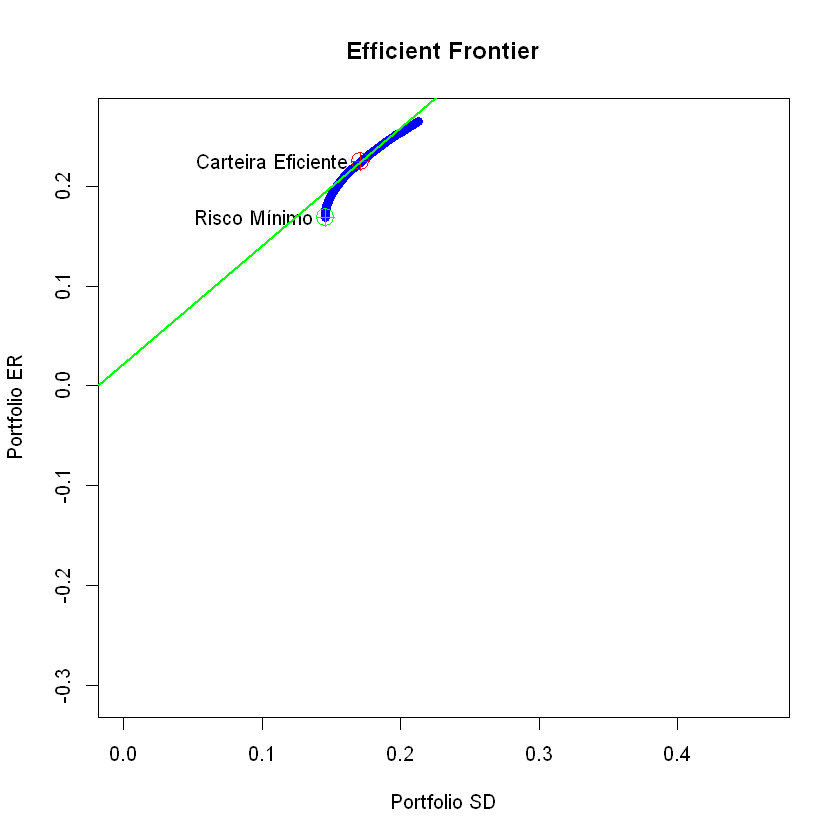

In [26]:
plot(fronteira_eficiente, plot.asset = TRUE, col = "blue", pch = 16)

points(carteira_min_risco$sd, carteira_min_risco$er, col = "green", pch = 10, cex = 2)
points(carteira_eficiente$sd, carteira_eficiente$er, col = "red", pch = 10, cex = 2)

text(carteira_min_risco$sd, carteira_min_risco$er, labels = "Risco Mínimo", pos = 2)
text(carteira_eficiente$sd, carteira_eficiente$er, labels = "Carteira Eficiente", pos = 2)

tangente <- (carteira_eficiente$er - tx_livre_risco)/carteira_eficiente$sd
abline(a = tx_livre_risco, b = tangente, col = "green", lwd = 2)

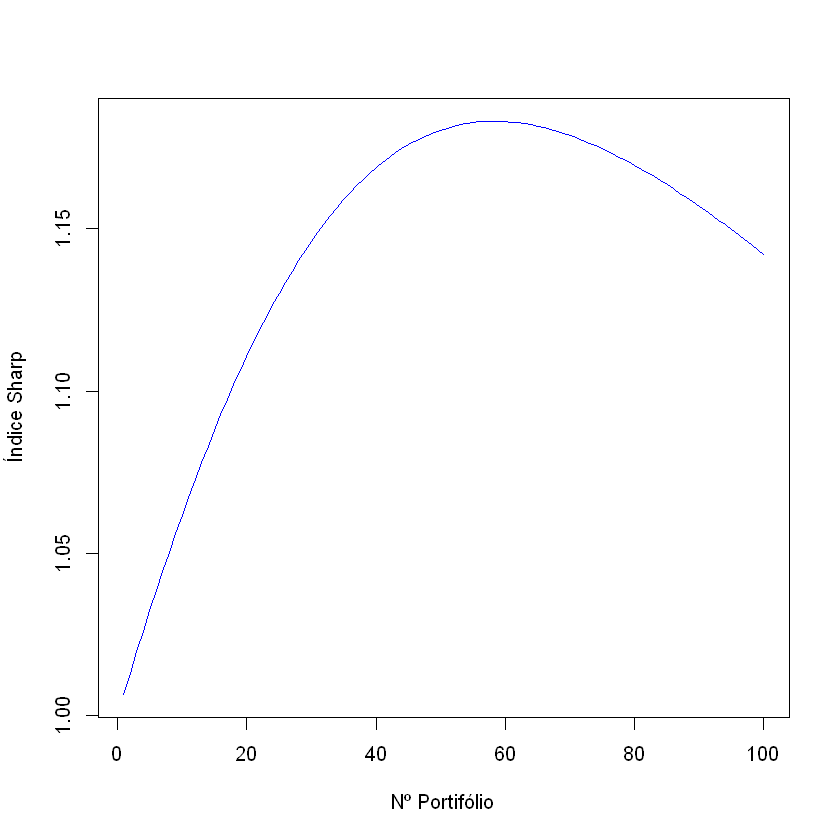

In [27]:
plot(1:npor, (fronteira_eficiente$er - tx_livre_risco)/fronteira_eficiente$sd,
     col = "blue", ylab = "Índice Sharp", xlab = "Nº Portifólio", type = 'l')